<h1>Test result analysis<h1>

In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics.cluster import pair_confusion_matrix
import seaborn as sn
font = {'size'   : 22}

plt.rc('font', **font)

<h2>Compute similarity matrices<h2>

The pair confusion matrix  computes a 2 by 2 similarity matrix between two clusterings by considering all pairs of samples and counting pairs that are assigned into the same or into different clusters under the true and predicted clusterings.

Considering a pair of samples that is clustered together a positive pair, then as in binary classification the count of true negatives is C00, false negatives is C10, true positives C11 is  and false positives is C01.

In [35]:
dataset = 'aniso'
configuration = 0

In [36]:
df_assignment_qkmeans = pd.read_csv("result/assignment/" + str(dataset) + "_qkmeans" + "_" + str(configuration) + ".csv", sep=',')
quantum_assignment = df_assignment_qkmeans['cluster']

In [37]:
df_assignment_kmeans = pd.read_csv("result/assignment/" + str(dataset) + "_kmeans" + "_" + str(0) + ".csv", sep=',')
classical_assignment = df_assignment_kmeans['cluster']

In [38]:
df_assignment_deltameans = pd.read_csv("result/assignment/" + str(dataset) + "_deltakmeans" + "_" + str(0) + ".csv", sep=',')
delta_assignment = df_assignment_deltameans['cluster']

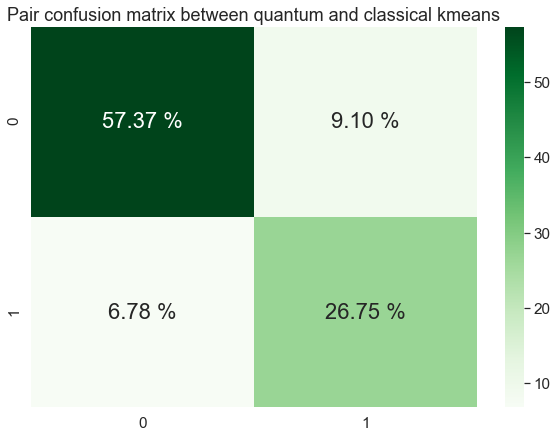

In [39]:
cm = pair_confusion_matrix(quantum_assignment, classical_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between quantum and classical kmeans", fontsize=18)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=1.4)

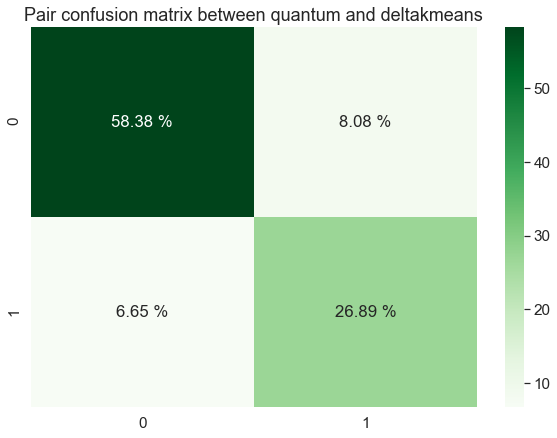

In [40]:
cm = pair_confusion_matrix(quantum_assignment, delta_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between quantum and deltakmeans", fontsize=18)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=1.4)

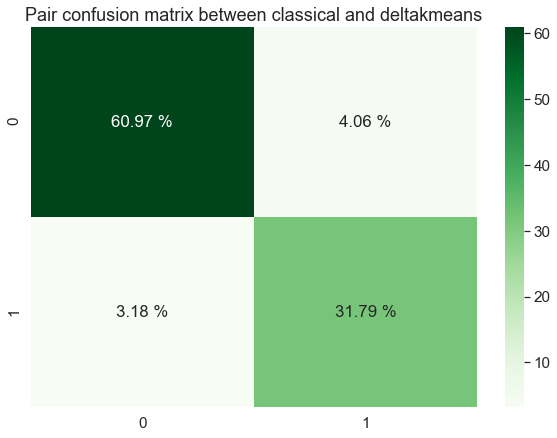

In [41]:
cm = pair_confusion_matrix(delta_assignment, classical_assignment)
plt.figure(figsize = (10,7))
plt.title("Pair confusion matrix between classical and deltakmeans", fontsize=18)
cm = (cm/np.sum(cm))*100
s = sn.heatmap(cm, annot=True, fmt=".2f", cmap='Greens')
for t in s.texts: t.set_text(t.get_text() + " %")
sn.set(font_scale=1.4)

<h2>Configuration analysis<h2>

In [42]:
dataset = 'aniso'

In [43]:
df_qkmeans = pd.read_csv("result/" + str(dataset) + "_qkmeans.csv", sep=',')
df_qkmeans

,index,date,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2021-12-26 11:25:26,3,500,2,4,16000,125,9,10,169.81,92.32,88.336,0.591,0.726,0.726
1,1,2021-12-26 11:25:33,3,500,2,4,16000,125,9,2,242.64,92.00,93.240,0.565,0.704,0.704
2,2,2021-12-26 11:25:43,3,500,2,4,16000,125,9,2,241.04,91.90,95.384,0.552,0.696,0.696
3,3,2021-12-26 11:25:54,3,500,2,4,16000,125,9,1,265.37,91.80,90.212,0.578,0.665,0.665


In [44]:
df_kmeans = pd.read_csv("result/" + str(dataset) + "_kmeans.csv", sep=',')
df_kmeans

,index,date,K,M,N,n_ite,avg_ite_time,SSE,silhouette,v_measure,nm_info
0,0,2021-12-26 11:53:54,3,500,2,10,0.01,59.177,0.691,0.686,0.686
1,1,2021-12-26 11:53:59,3,500,2,10,0.00,59.177,0.691,0.686,0.686
2,2,2021-12-26 11:54:05,3,500,2,10,0.00,59.177,0.691,0.686,0.686
3,3,2021-12-26 11:54:11,3,500,2,10,0.00,59.177,0.691,0.686,0.686


In [45]:
df_deltakmeans = pd.read_csv("result/" + str(dataset) + "_deltakmeans.csv", sep=',')
df_deltakmeans

,index,date,K,M,N,n_ite,avg_ite_time,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2021-12-26 11:54:16,3,500,2,10,0.05,92.14,70.533,0.650,0.714,0.714
1,1,2021-12-26 11:54:23,3,500,2,1,0.02,80.80,122.643,0.407,0.487,0.487
2,2,2021-12-26 11:54:28,3,500,2,1,0.05,80.00,125.282,0.381,0.488,0.488
3,3,2021-12-26 11:54:34,3,500,2,1,0.04,82.00,121.909,0.396,0.505,0.505


In [46]:
df_qkmeans[df_qkmeans['SSE']==min(df_qkmeans['SSE'])]

,index,date,K,M,N,M1,shots,n_circuits,max_qbits,n_ite,avg_ite_time,avg_similarity,SSE,silhouette,v_measure,nm_info
0,0,2021-12-26 11:25:26,3,500,2,4,16000,125,9,10,169.81,92.32,88.336,0.591,0.726,0.726


TypeError: cannot convert the series to <class 'float'>

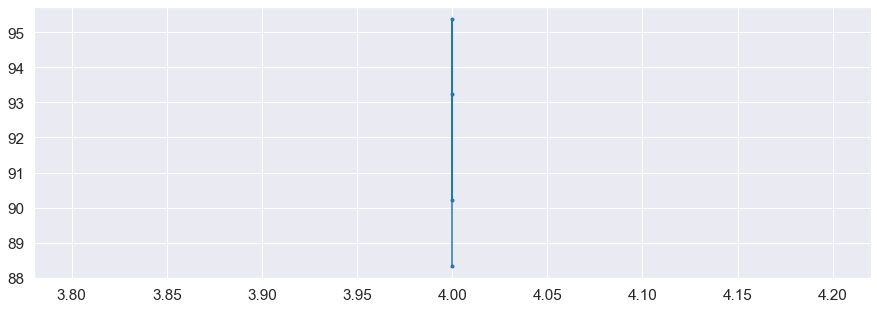

In [47]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['SSE'], color='tab:blue', marker=".", label='SSE qkmeans')
plt.axhline(y=float(df_kmeans['SSE']), color='tab:red', linestyle='--', label='SSE kmeans')
plt.axhline(y=float(df_deltakmeans['SSE']), color='tab:green', linestyle='--', label='SSE deltakmeans')
plt.title("SEE changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

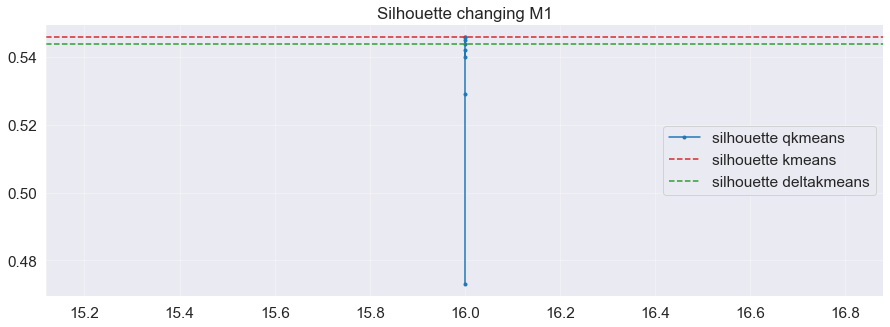

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['silhouette'], color='tab:blue', marker=".", label='silhouette qkmeans')
plt.axhline(y=float(df_kmeans['silhouette']), color='tab:red', linestyle='--', label='silhouette kmeans')
plt.axhline(y=float(df_deltakmeans['silhouette']), color='tab:green', linestyle='--', label='silhouette deltakmeans')
plt.title("Silhouette changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

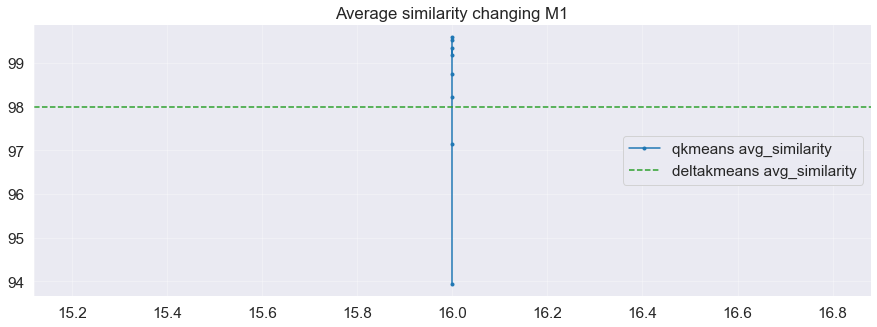

In [19]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['M1'],df_qkmeans['avg_similarity'], marker=".", color='tab:blue', label='qkmeans avg_similarity')
plt.axhline(y=int(df_deltakmeans['avg_similarity']), color='tab:green', linestyle='--', label='deltakmeans avg_similarity')
plt.title("Average similarity changing M1")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Shots analysis<h2>

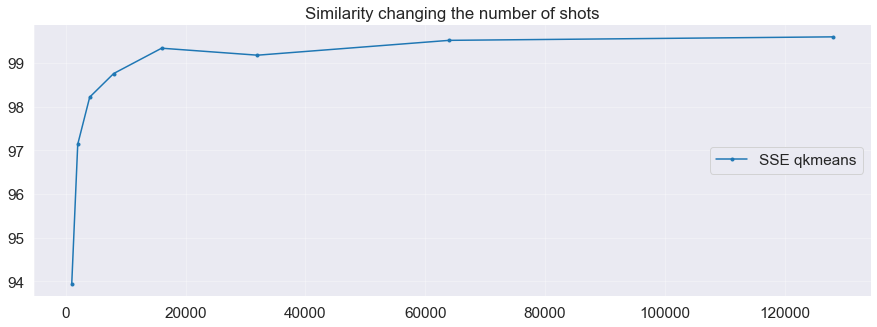

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df_qkmeans['shots'],df_qkmeans['avg_similarity'], color='tab:blue', marker=".", label='SSE qkmeans')
plt.title("Similarity changing the number of shots")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Measure analysis per iteration<h2>

In [26]:
dataset = 'noisymoon'
configuration = 7

In [27]:
df_measure_qkmeans = pd.read_csv("result/measures/" + str(dataset) + "_qkmeans_" + str(configuration) + ".csv", sep=',')
df_measure_deltakmeans = pd.read_csv("result/measures/" + str(dataset) + "_deltakmeans_0.csv", sep=',')

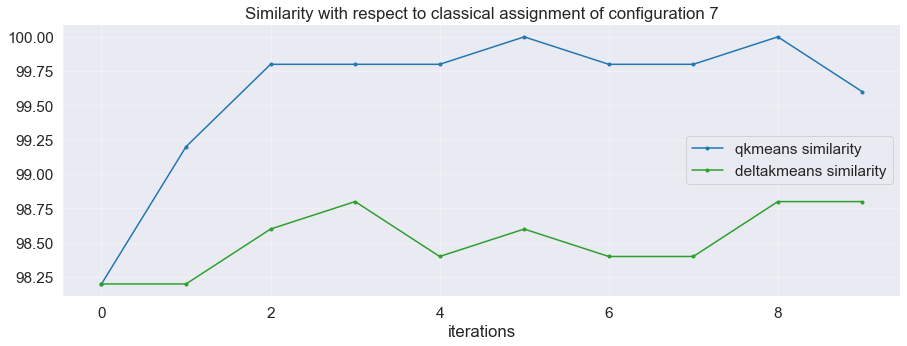

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Similarity with respect to classical assignment of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['similarity'], marker=".", color='tab:blue', label='qkmeans similarity')
ax.plot(df_measure_deltakmeans['similarity'], marker=".", color="tab:green", label='deltakmeans similarity')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

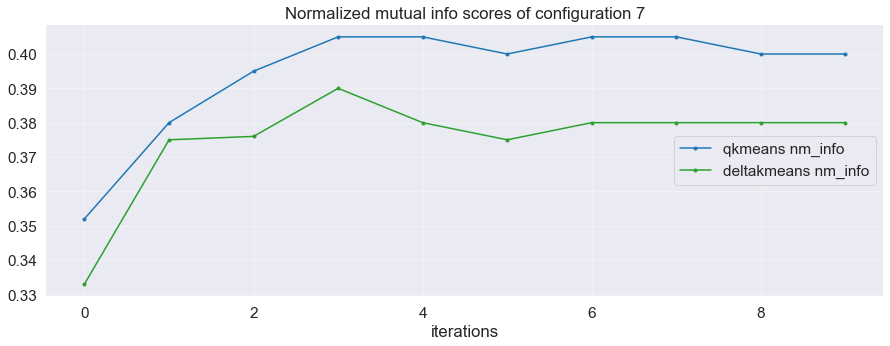

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Normalized mutual info scores of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['nm_info'], marker=".", color='tab:blue', label='qkmeans nm_info')
ax.plot(df_measure_deltakmeans['nm_info'], marker=".", color="tab:green", label='deltakmeans nm_info')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

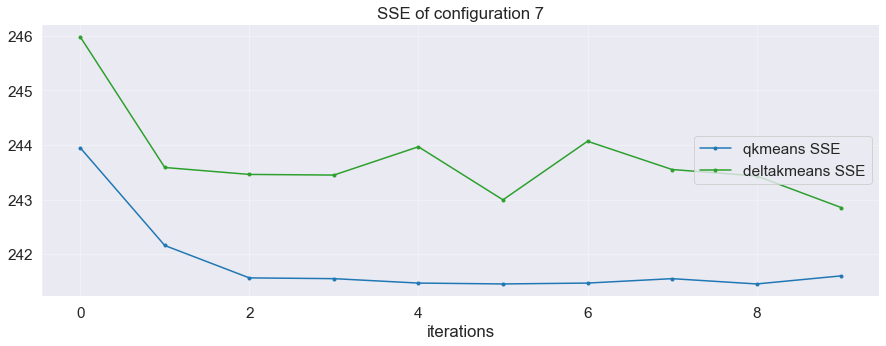

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("SSE of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['SSE'], marker=".", color='tab:blue', label='qkmeans SSE')
ax.plot(df_measure_deltakmeans['SSE'], marker=".", color="tab:green", label='deltakmeans SSE')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

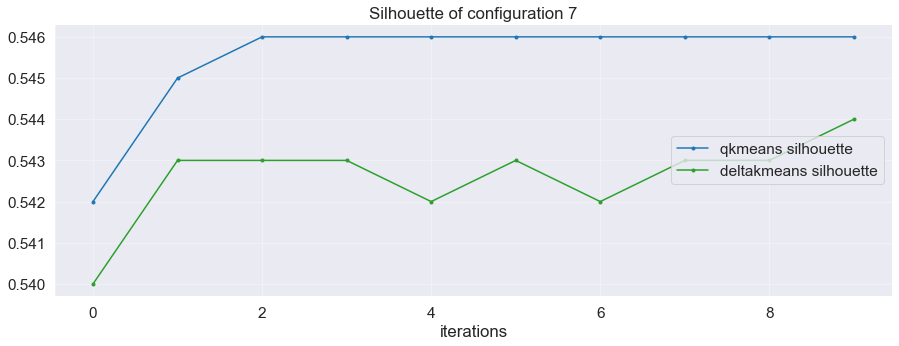

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Silhouette of configuration " + str(configuration))
ax.set(xlabel='iterations')
ax.plot(df_measure_qkmeans['silhouette'], marker=".", color='tab:blue', label='qkmeans silhouette')
ax.plot(df_measure_deltakmeans['silhouette'], marker=".", color="tab:green", label='deltakmeans silhouette')
ax.legend()
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

<h2>Cluster result<h2>

In [15]:
dataset = ['aniso','blobs','blobs2','noisymoon']
configuration = 0

In [20]:
'''
f, axarr = plt.subplots(len(dataset),3)

curr_row = 0
for index, d in enumerate(dataset):
    
    a = plt.imread("./plot/cluster/" + str(d) + "_kmeans_0.png")
    b = plt.imread("./plot/cluster/" + str(d) + "_deltakmeans_0.png")
    c = plt.imread("./plot/cluster/" + str(d) + "_qkmeans_0.png")

    axarr[index,0].imshow(a)
    axarr[index,0].axis('off')
    axarr[index,1].imshow(b)
    axarr[index,1].axis('off')
    axarr[index,2].imshow(c)
    axarr[index,2].axis('off')
'''

'\nf, axarr = plt.subplots(len(dataset),3)\n\ncurr_row = 0\nfor index, d in enumerate(dataset):\n    \n    a = plt.imread("./plot/cluster/" + str(d) + "_kmeans_0.png")\n    b = plt.imread("./plot/cluster/" + str(d) + "_deltakmeans_0.png")\n    c = plt.imread("./plot/cluster/" + str(d) + "_qkmeans_0.png")\n\n    axarr[index,0].imshow(a)\n    axarr[index,0].axis(\'off\')\n    axarr[index,1].imshow(b)\n    axarr[index,1].axis(\'off\')\n    axarr[index,2].imshow(c)\n    axarr[index,2].axis(\'off\')\n'

In [13]:
configuration = 8

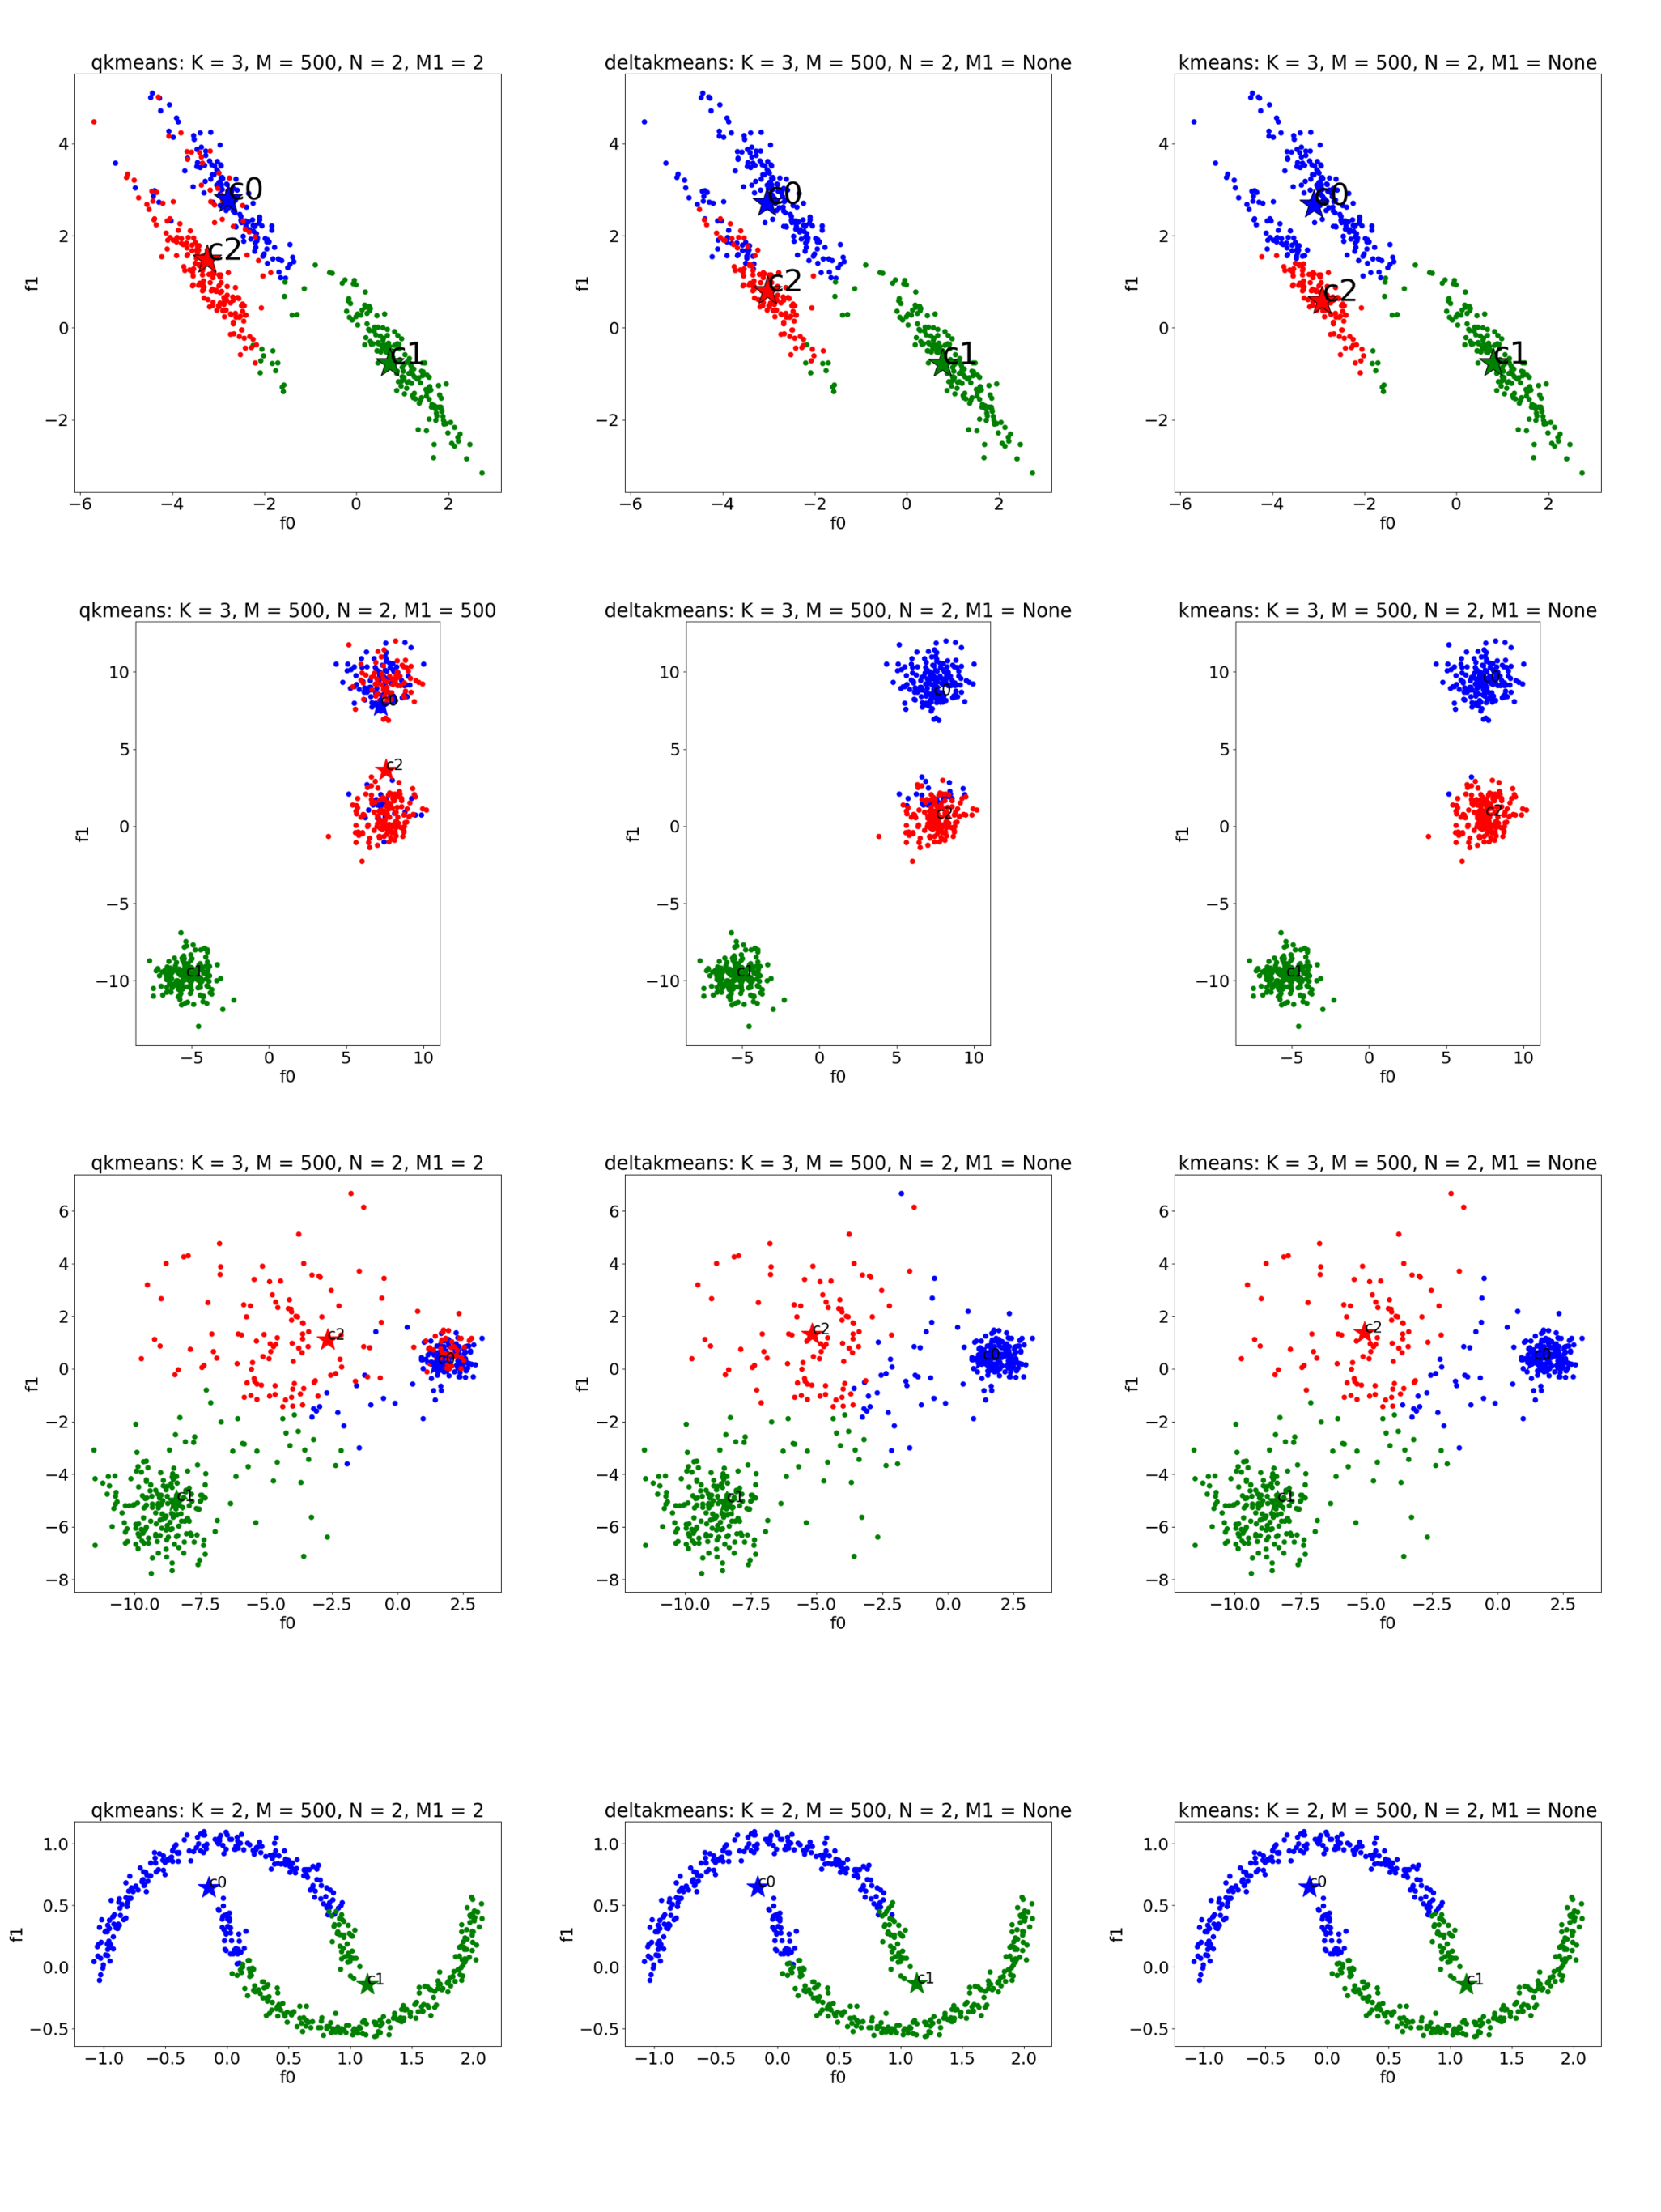

In [17]:
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((800,800))
    img = np.asarray(img)
    return img

img_arr = []

for index, d in enumerate(dataset):
    
    img_arr.append(img_reshape("./plot/cluster/" + str(d) + "_qkmeans_" + str(configuration) + ".png"))
    img_arr.append(img_reshape("./plot/cluster/" + str(d) + "_deltakmeans_0.png"))
    img_arr.append(img_reshape("./plot/cluster/" + str(d) + "_kmeans_0.png"))


fig = plt.figure(figsize=(50., 50.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(len(dataset), 3),  # creates 2x2 grid of axes
                 axes_pad=0,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)
    ax.axis('off')

plt.show()

<h2>probabilities analysis <h2>

In [26]:
dataset = 'iris'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_1-inf
0,0,64,4,1,0.25,18.530273,37.438965
1,1,64,4,2,0.25,24.902344,53.796387
2,2,64,4,3,0.25,21.704102,48.559570
3,3,64,4,4,0.25,24.682617,50.585938
4,4,64,4,5,0.25,21.057129,41.638184
5,5,64,4,6,0.25,22.314453,44.689941
6,6,64,4,7,0.25,22.387695,48.583984
7,7,64,4,8,0.25,25.341797,53.039551


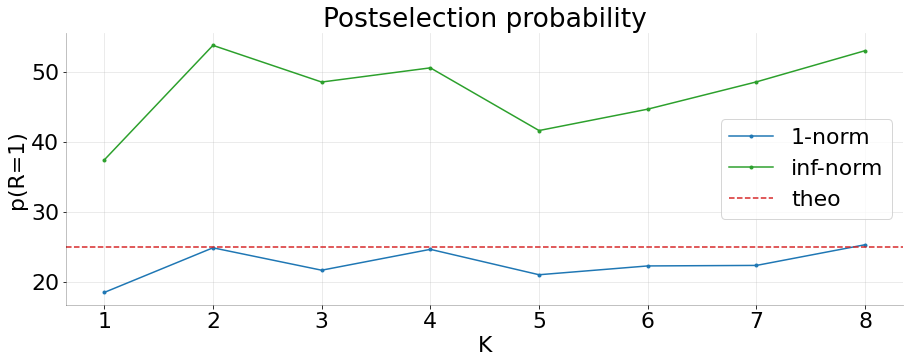

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['K'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['K'],df_prob['p(R=1)_1-inf'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("K")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [ ]:
# ora mi prendoo una configurazione ideale dei parametri (per iris k=3, m1 = 8, sempre sample di 64 ) e tenendo fisso il numero di shots 
# eseguo prima la versione con 1-norm e poi quella con inf-norm facendo vedere la differenza nella similarity

In [6]:
dataset = 'noisymoon'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,2.0,2.0,0.5,49.989,60.212
1,1,4.0,2.0,2.0,0.5,50.038,60.208
2,2,8.0,2.0,2.0,0.5,49.716,59.654
3,3,16.0,2.0,2.0,0.5,49.377,59.792
4,4,32.0,2.0,2.0,0.5,48.577,58.252
5,5,64.0,2.0,2.0,0.5,47.611,57.259
6,6,128.0,2.0,2.0,0.5,46.039,55.194
7,7,150.0,2.0,2.0,0.5,38.965,46.045


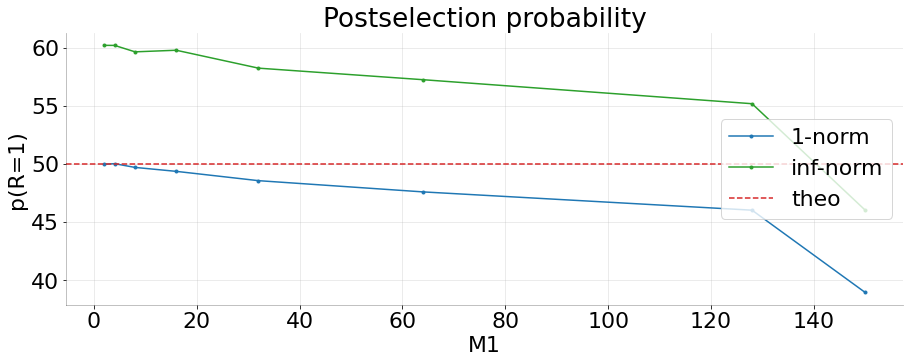

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [9]:
dataset = 'blobs'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,2.0,3.0,0.5,43.657,61.460
1,1,4.0,2.0,3.0,0.5,43.795,61.353
2,2,8.0,2.0,3.0,0.5,43.292,61.035
3,3,16.0,2.0,3.0,0.5,43.202,60.430
4,4,32.0,2.0,3.0,0.5,42.561,59.106
5,5,64.0,2.0,3.0,0.5,41.687,57.601
6,6,128.0,2.0,3.0,0.5,40.265,56.421
7,7,150.0,2.0,3.0,0.5,34.045,47.107


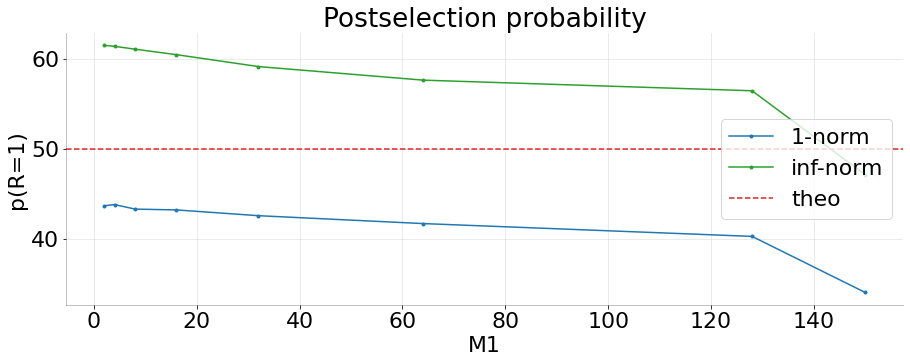

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [12]:
dataset = 'iris'
df_prob = pd.read_csv("result/probabilities/" + str(dataset) + ".csv", sep=',')
df_prob

,Unnamed: 0,M1,N,K,p(R=1)_theo,p(R=1)_1-norm,p(R=1)_inf-norm
0,0,2.0,4.0,3.0,0.25,21.905,51.079
1,1,4.0,4.0,3.0,0.25,21.768,51.183
2,2,8.0,4.0,3.0,0.25,21.558,50.869
3,3,16.0,4.0,3.0,0.25,21.827,50.497
4,4,32.0,4.0,3.0,0.25,20.967,49.211
5,5,64.0,4.0,3.0,0.25,20.496,48.665
6,6,128.0,4.0,3.0,0.25,19.904,47.437
7,7,150.0,4.0,3.0,0.25,16.724,40.198


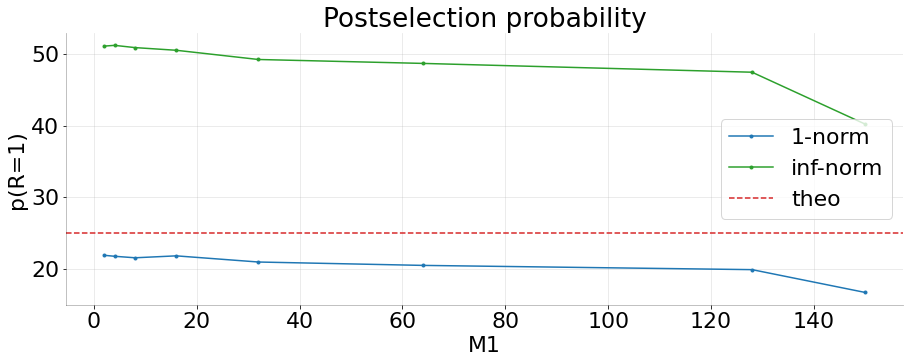

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df_prob['M1'],df_prob['p(R=1)_1-norm'], color='tab:blue', marker=".", label='1-norm')
plt.plot(df_prob['M1'],df_prob['p(R=1)_inf-norm'], color='tab:green', marker=".", label='inf-norm')
plt.axhline(y=df_prob['p(R=1)_theo'][0]*100, color='tab:red', linestyle='--', label='theo')
plt.title("Postselection probability")
plt.xlabel("M1")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [2]:
m = [x for x in range(2,65)]

In [3]:
prob = [50.008,43.846,50.077,40.693,44.071,47.056,49.958,39.902,41.574,42.608,44.492,45.138,46.875,48.705,50.296,38.507,40.12,40.766,42.065,42.505,41.628,43.744,45.081,44.545,44.858,44.741,47.83,46.826,48.833,49.263,50.064,40.231,40.909,40.085,39.252,39.255,41.626,40.799,42.563,40.9,43.509,42.143,41.691,41.85,41.488,41.333,45.911,45.573,45.931,44.926,44.214,44.189,44.763,44.303,48.027,46.932,46.159,45.772,48.808]

In [4]:
len(prob)

59

In [7]:
len(m)

59

In [6]:
m = [x for x in range(2,61)] 

In [11]:
prob = [x/100 for x in prob]

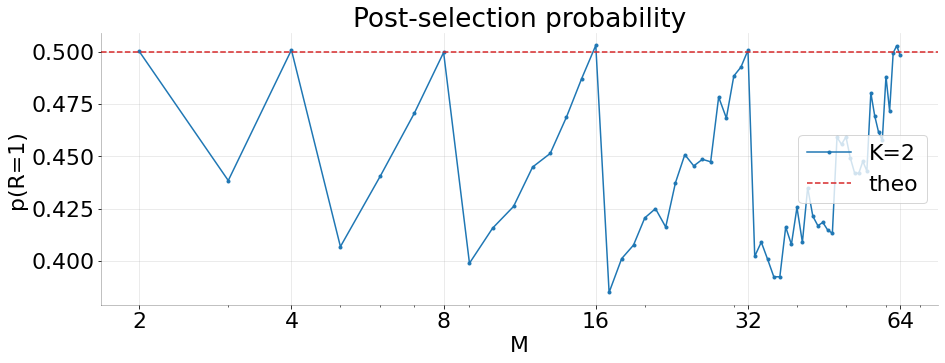

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 7)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
#plt.plot(m,prob2, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='right', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [34]:
prob2 = [x-0.2 for x in prob]

In [21]:
prob

[0.5000800000000001,
 0.43845999999999996,
 0.5007699999999999,
 0.40692999999999996,
 0.44071,
 0.47056,
 0.49957999999999997,
 0.39902,
 0.41574,
 0.42607999999999996,
 0.44492,
 0.45138,
 0.46875,
 0.48705,
 0.50296,
 0.38506999999999997,
 0.4012,
 0.40765999999999997,
 0.42064999999999997,
 0.42505000000000004,
 0.41628,
 0.43744,
 0.45081000000000004,
 0.44545,
 0.44858,
 0.44741,
 0.4783,
 0.46826,
 0.48833,
 0.49262999999999996,
 0.50064,
 0.40231,
 0.40909,
 0.40085,
 0.39252000000000004,
 0.39255,
 0.41625999999999996,
 0.40799,
 0.42563,
 0.409,
 0.43509,
 0.42143,
 0.41691,
 0.41850000000000004,
 0.41487999999999997,
 0.41333,
 0.45911,
 0.45573,
 0.45931,
 0.44926,
 0.44214,
 0.44189,
 0.44763,
 0.44303,
 0.48027000000000003,
 0.46932,
 0.46159,
 0.45771999999999996,
 0.48808]

In [22]:
p1 = [47.164,49.935,50.277,49.823]

In [24]:
p1 = [x/100 for x in p1]

In [25]:
len(prob) + len(p1)

63

In [30]:
prob = prob + p1

In [32]:
prob

[0.5000800000000001,
 0.43845999999999996,
 0.5007699999999999,
 0.40692999999999996,
 0.44071,
 0.47056,
 0.49957999999999997,
 0.39902,
 0.41574,
 0.42607999999999996,
 0.44492,
 0.45138,
 0.46875,
 0.48705,
 0.50296,
 0.38506999999999997,
 0.4012,
 0.40765999999999997,
 0.42064999999999997,
 0.42505000000000004,
 0.41628,
 0.43744,
 0.45081000000000004,
 0.44545,
 0.44858,
 0.44741,
 0.4783,
 0.46826,
 0.48833,
 0.49262999999999996,
 0.50064,
 0.40231,
 0.40909,
 0.40085,
 0.39252000000000004,
 0.39255,
 0.41625999999999996,
 0.40799,
 0.42563,
 0.409,
 0.43509,
 0.42143,
 0.41691,
 0.41850000000000004,
 0.41487999999999997,
 0.41333,
 0.45911,
 0.45573,
 0.45931,
 0.44926,
 0.44214,
 0.44189,
 0.44763,
 0.44303,
 0.48027000000000003,
 0.46932,
 0.46159,
 0.45771999999999996,
 0.48808,
 0.47164,
 0.49935,
 0.50277,
 0.49823]

In [28]:
m.append(61)
m.append(62)
m.append(63)
m.append(64)

In [2]:
prob = [50.008,43.846,50.077,40.693,44.071,47.056,49.958,39.902,41.574,42.608,44.492,45.138,46.875,48.705,50.296,38.507,40.12,40.766,42.065,42.505,41.628,43.744,45.081,44.545,44.858,44.741,47.83,46.826,48.833,49.263,50.064,40.231,40.909,40.085,39.252,39.255,41.626,40.799,42.563,40.9,43.509,42.143,41.691,41.85,41.488,41.333,45.911,45.573,45.931,44.926,44.214,44.189,44.763,44.303,48.027,46.932,46.159,45.772,48.808,47.164,49.935,50.277,49.823,43.457,43.347,43.365,43.213,43.073,43.14,43.091,42.096,44.171,42.999,42.2,42.377,42.572,42.413,42.737,41.913,42.572,41.272,42.072,41.846,41.235,41.663,41.016,41.492,41.473,40.741,41.687,41.223,40.369,40.222,40.918,47.107,45.856,46.594,45.306,46.436,45.27,45.367,44.928,44.263,43.555,43.872,43.646,43.359,42.828,43.085,42.31,48.566,46.985,47.174,46.326,45.496,45.056,44.55,42.505,48.767,47.803,45.966,45.715,50.171,46.735,50.366,43.762,49.402]


In [3]:
m=[x for x in range(2,129)]

In [7]:
prob = [x/100 for x in prob]

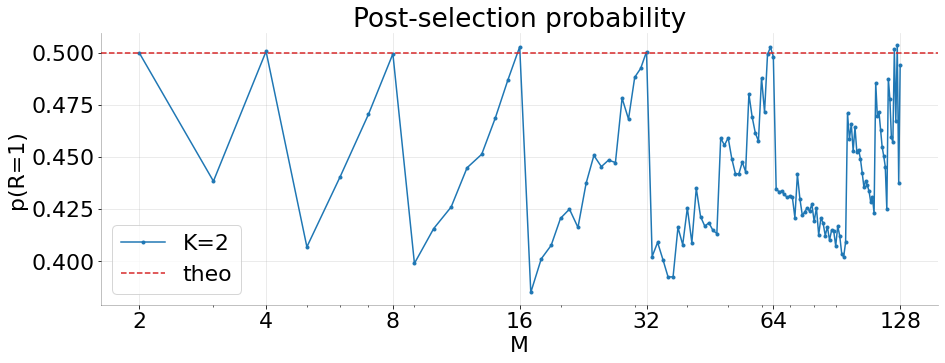

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
#plt.plot(m,prob2, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

In [12]:
probk3 = [43.819,37.621,43.667,34.583,37.644,40.789,43.764,33.53,34.894,36.36,38.286,39.023,41.278,42.348,43.849,31.834,34.044,34.755,35.507,36.272,35.384,36.928,38.234,37.927,38.74,38.535,41.177,40.713,42.4,43.374,44.485,33.908,33.64,33.319,33.069,33.017,35.587,34.967,36.6,34.491,36.89,35.539,35.242,34.762,35.787,34.843,39.571,39.738,38.953,39.001,38.489,38.468,38.155,37.805,41.492,41.048,40.153,39.482,42.346,40.629,43.595,43.66,44.067,37.994,37.598,37.317,36.646,36.127,37.305,37.073,36.505,36.707,37.616,36.578,36.243,36.292,36.664,36.157,35.718,36.145,35.87,35.01,35.028,35.522,35.516,34.93,35.748,34.796,35.333,34.833,34.589,34.644,34.961,34.906,40.625,39.661,40.527,40.192,40.21,39.984,38.812,38.568,37.366,38.049,37.549,37.903,37.457,36.383,36.81,36.749,42.041,41.479,40.741,39.673,39.221,39.331,38.568,37.061,43.011,41.077,40.472,38.507,42.822,40.24,44.043,37.903,43.982]

In [16]:
probk3 = [c/100 for c in probk3]

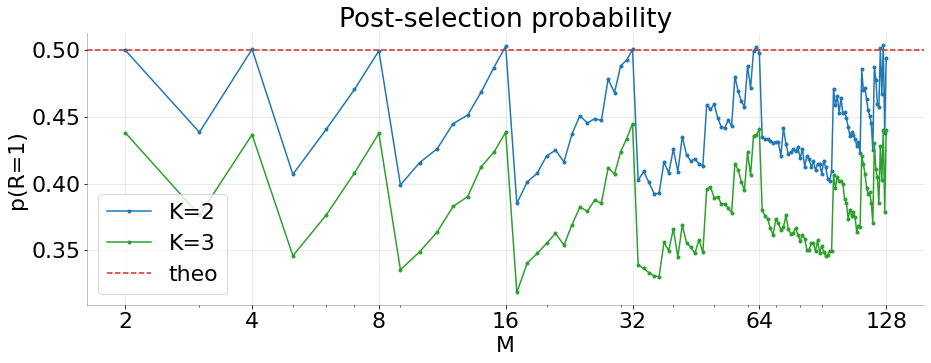

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
x_ticks = [2**i for i in range(0, 8)]
ax.set_xticks(x_ticks, [str(i) for i in x_ticks])
plt.plot(m,prob, color='tab:blue', marker=".", label='K=2')
plt.plot(m,probk3, color='tab:green', marker=".", label='K=3')
plt.axhline(y=0.5, color='tab:red', linestyle='--', label='theo')
plt.title("Post-selection probability")
plt.xlabel("M")
plt.ylabel("p(R=1)")
plt.legend(loc='lower left', ncol=1)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()